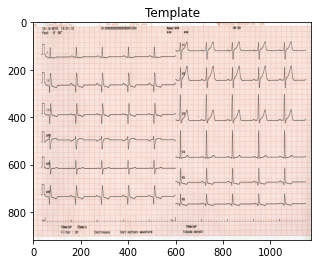

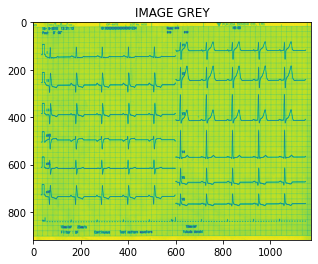

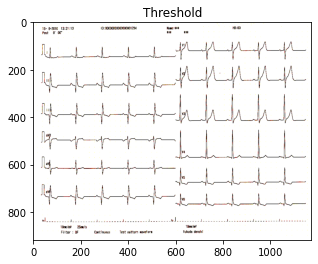

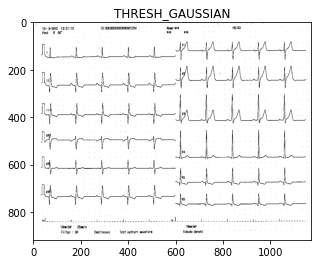

Contours count = 335


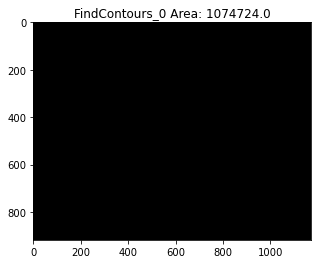

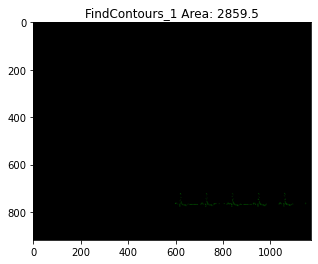

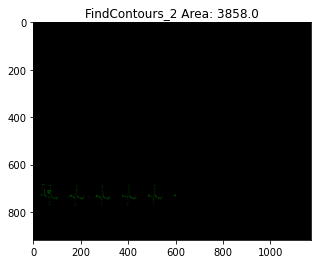

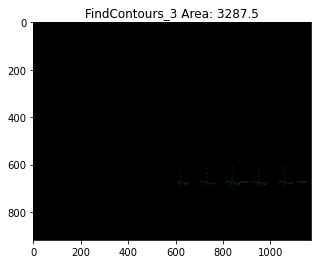

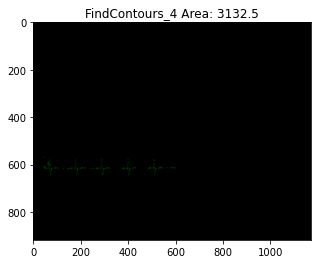

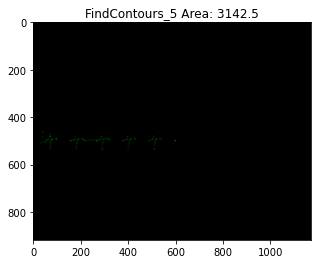

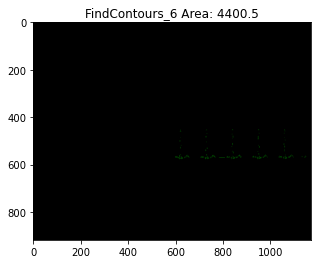

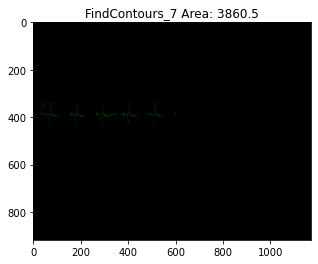

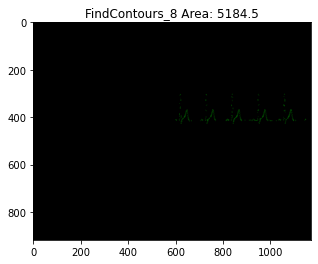

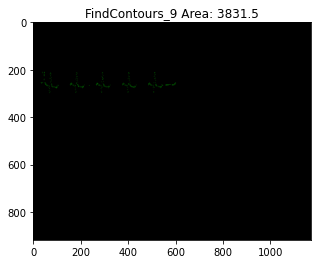

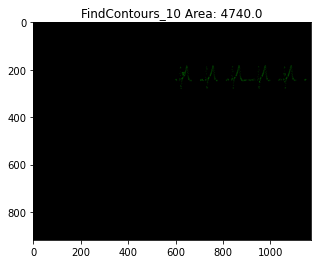

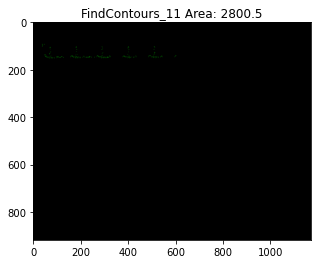

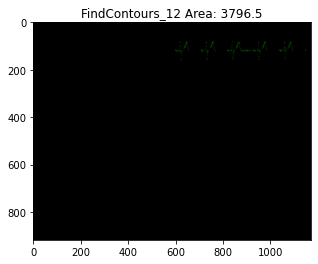

True

In [5]:
import cv2 
import imutils
import numpy as np
from matplotlib import pyplot as plt

#define 
PIXEL_MIN = 500

template = cv2.imread('sample3.jpg')  # sample2.jpg
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
#template = cv2.Canny(template, 10, 25)

# Show template
plt.imshow(template)
plt.title('Template')
plt.show()

img_grey = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Show template
plt.imshow(img_grey)
plt.title('IMAGE GREY')
plt.show()

ret, thresh4 = cv2.threshold(template, 120, 255, cv2.THRESH_BINARY)

# Show template
plt.imshow(thresh4)
plt.title('Threshold')
plt.show()

img_grey_tres = cv2.cvtColor(thresh4, cv2.COLOR_BGR2GRAY)
proc = cv2.adaptiveThreshold(img_grey_tres, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
img_real = cv2.cvtColor(proc, cv2.COLOR_BGR2RGB)

# Show template
plt.imshow(img_real)
plt.title('THRESH_GAUSSIAN')
plt.show()
#--------------------------------------------------------------------------------------

img = thresh4.copy()

#convert img to grey
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 1)
#save image
cv2.imwrite('result_contours.bmp',img_contours.astype('uint8')) 

print("Contours count = "+str(len(contours)))
i=0
for contour in contours:
    if cv2.contourArea(contour) >= PIXEL_MIN:
        #create an empty image for contours
        img_contours = np.zeros(img.shape)
        # draw the contours on the empty image
        cv2.drawContours(img_contours, contour, -1, (0,255,0), 1)
        #print image
        plt.imshow(img_contours.astype('uint8'))
        plt.title('FindContours_'+str(i)+' Area: '+str(cv2.contourArea(contour)))
        plt.show()
        x, y, width, height = cv2.boundingRect(contour)
        roi = img[y:y+height, x:x+width]
        cv2.imwrite("roi"+str(i)+".png", roi)
        i=i+1

#SAVE RESULT TO FILE BMP
cv2.imwrite('result_thresh4.bmp',thresh4)